# Домашнее задание "Визуализация данных в Python"
## Преподаватель: Олег Булыгин
## Студент: Сотский Григорий

In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('movies.dat', sep = '::', engine='python', names = ['movieId', 'movieName', 'moveType'])
ratings = pd.read_csv('ratings.dat', sep = '::', engine='python', names = ['userId', 'movieId', 'rating', 'timestamp'])

In [3]:
def production_year(row):
    for year_ in years:
        if str(year_) in row['movieName']:
            return year_

In [4]:
years = list(range(1950, 2000))
movies['year'] = movies.apply(production_year, axis=1)
joined = ratings.merge(movies, on='movieId', how='left')
joined.head()

,userId,movieId,rating,timestamp,movieName,moveType,year
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1975.0
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,1996.0
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,1964.0
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,NaN
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,1998.0


In [5]:
years_rate = joined[['rating', 'year']]
years_rate = years_rate.dropna()
years_rate['year'] = years_rate.year.astype('str')

In [6]:
moves_rating = years_rate.groupby('year')[['rating']].mean()
moves_rating.head()

,rating
year,
1950.0,4.005405
1951.0,4.086327
1952.0,4.126487
1953.0,3.866646
1954.0,4.045523


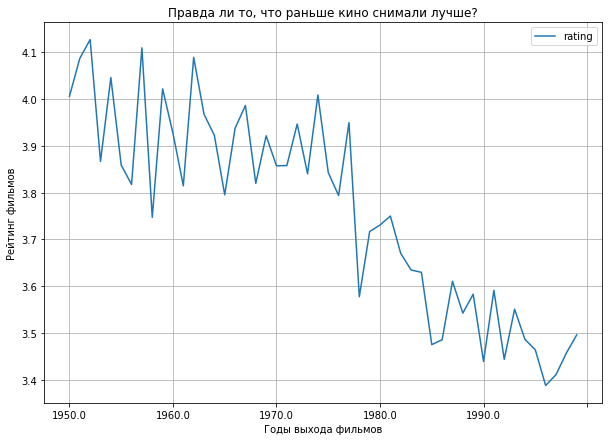

In [7]:
moves_rating.plot()
plt.xlabel('Годы выхода фильмов')
plt.ylabel('Рейтинг фильмов')
plt.title('Правда ли то, что раньше кино снимали лучше?')
plt.grid()
plt.show()

In [8]:
top_rating = moves_rating.sort_values('rating', ascending=False).head(10)

In [9]:
top_rating.style.bar('rating')

,rating
year,
1952.0,4.126487
1957.0,4.108890
1962.0,4.088641
1951.0,4.086327
1954.0,4.045523
1959.0,4.021418
1974.0,4.008213
1950.0,4.005405
1967.0,3.985953


In [10]:
import seaborn as sns

In [11]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

#### Динамика регистрации актов гражданского состояния в Москве от 08/05/2020
[Ссылка](https://data.mos.ru/opendata/7704111479-dinamika-registratsii-aktov-grajdanskogo-sostoyaniya/passport?versionNumber=3&releaseNumber=42)

In [12]:
zags_mos = pd.read_csv('data-6267-2020-05-08.csv', encoding = 'utf-8', sep = ';')

In [13]:
zags_mos.head()

,ID,Year,Month,StateRegistrationOfBirth,NumberOfBirthCertificatesForBoys,NumberOfBirthCertificatesForGirls,StateRegistrationOfDeath,StateRegistrationOfMarriage,StateRegistrationOfDivorce,StateRegistrationOfPaternityExamination,StateRegistrationOfAdoption,StateRegistrationOfNameChange,TotalNumber,global_id
0,1,2010,01yan,9206,4785,4421,10430,4997,3302,1241,95,491,29762,37591658
1,2,2010,02feb,9060,4656,4404,9573,4873,2937,1326,97,639,28505,37591659
2,3,2010,03mar,10934,5630,5304,10528,3642,4361,1644,147,717,31973,37591660
3,4,2010,04apr,10140,5278,4862,9501,9698,3943,1530,128,642,35572,37591661
4,5,2010,05may,9457,4825,4632,9482,3726,3554,1397,96,492,28204,37591662


In [14]:
zags_mos_death = zags_mos.pivot_table(
                        index='Year', 
                        columns='Month', 
                        values='StateRegistrationOfDeath', 
                        aggfunc=sum).fillna(0).applymap(float)

zags_mos_death

Month,01yan,02feb,03mar,04apr,05may,06jun,07jul,08aug,09sen,10oct,11nov,12dec
Year,,,,,,,,,,,,
2010,10430.0,9573.0,10528.0,9501.0,9482.0,9529.0,14340.0,15016.0,9573.0,9350.0,9091.0,9664.0
2011,10113.0,9011.0,9878.0,9274.0,9211.0,8608.0,8906.0,9279.0,9117.0,9614.0,9465.0,9435.0
2012,10156.0,9786.0,10100.0,9480.0,9459.0,8963.0,9193.0,9184.0,9233.0,10493.0,9577.0,10576.0
2013,11184.0,9396.0,10084.0,9894.0,9724.0,8520.0,9384.0,9261.0,9210.0,10143.0,9434.0,9967.0
2014,10311.0,9235.0,10256.0,9884.0,10219.0,8924.0,9547.0,9054.0,9821.0,10315.0,9042.0,10783.0
2015,11042.0,10146.0,10886.0,10271.0,9742.0,9649.0,9629.0,9483.0,9821.0,10559.0,9973.0,10816.0
2016,11673.0,10320.0,10262.0,9923.0,10099.0,9720.0,9373.0,10042.0,9841.0,10346.0,10194.0,12086.0
2017,11858.0,9405.0,10193.0,9569.0,9966.0,9314.0,9669.0,9634.0,9420.0,10490.0,9644.0,10121.0
2018,10733.0,9992.0,11752.0,10861.0,9862.0,9780.0,9487.0,9661.0,9251.0,10637.0,9884.0,10497.0


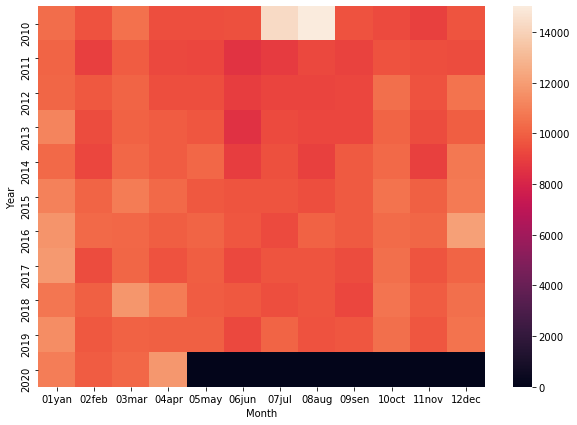

In [15]:
# Смертность в Москве по месяцам за последние 10 лет
# Сразу бросается в глаза лето 2010: жара и лесные пожары. Короновирусный апрель хотя и выделяется, но не сильно
ax = sns.heatmap(zags_mos_death)

In [16]:
# Проверим отдельно апрель, насколько выросла смертность из-за короновируса
zags_mos_apr = zags_mos[zags_mos['Month']=='04apr']

In [17]:
trace0 = go.Bar(
    x=zags_mos_apr.Year,
    y=zags_mos_apr.StateRegistrationOfDeath,
    name='StateRegistrationOfDeath',
    orientation = 'v'
)


data = [trace0]
layout = {'title': 'Статистика смертности в Москве в апреле за последние 10 лет'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [18]:
trace0 = go.Bar(
    x=zags_mos.Year,
    y=zags_mos.NumberOfBirthCertificatesForBoys,
    name='Мальчики',
    orientation = 'v'
)

trace1 = go.Bar(
    x=zags_mos.Year,
    y=zags_mos.NumberOfBirthCertificatesForGirls,
    name='Девочки',
    orientation = 'v'
)

data = [trace0, trace1]
layout = {'title': 'Кого больше рождается в Москве?'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [19]:
# chart stages data
values = [zags_mos.StateRegistrationOfDeath.sum(), zags_mos.StateRegistrationOfDivorce.sum(), zags_mos.StateRegistrationOfMarriage.sum(), zags_mos.StateRegistrationOfBirth.sum()]
phases = ['Померли', 'Развелись', 'Женились', 'Родились']
colors = ['rgb(200,200,200)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)']

In [20]:
n_phase = len(phases)
plot_width = 400

# height of a section and difference between sections 
section_h = 100
section_d = 10

# multiplication factor to calculate the width of other sections
unit_width = plot_width / max(values)

# width of each funnel section relative to the plot width
phase_w = [int(value * unit_width) for value in values]

# plot height based on the number of sections and the gap in between them
height = section_h * n_phase + section_d * (n_phase - 1)

In [21]:
# list containing all the plot shapes
shapes = []

# list containing the Y-axis location for each section's name and value text
label_y = []

for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
        else:
                points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (text)
        label_y.append(height - (section_h / 2))

        height = height - (section_h + section_d)

# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(40,40,40)',
        size=15
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(40,40,40)',
        size=15
    )
)

data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Воронка жизни</b>",
    titlefont=dict(
        size=20,
        color='rgb(0,0,0)'
    ),
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(255,255,255,1)',
    plot_bgcolor='rgba(255,255,255,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
        showgrid=False,
        range=[-450, 450]
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False,
        showgrid=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)